In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
# create engine to hawaii.sqlite
zip_database_path = r"C:\Users\Brian Haynes\Downloads\Starter_Code (10)\Starter_Code\Resources\hawaii.sqlite"
engine = create_engine(f"sqlite:///{zip_database_path}")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [5]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [24]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent


('2017-08-23',)

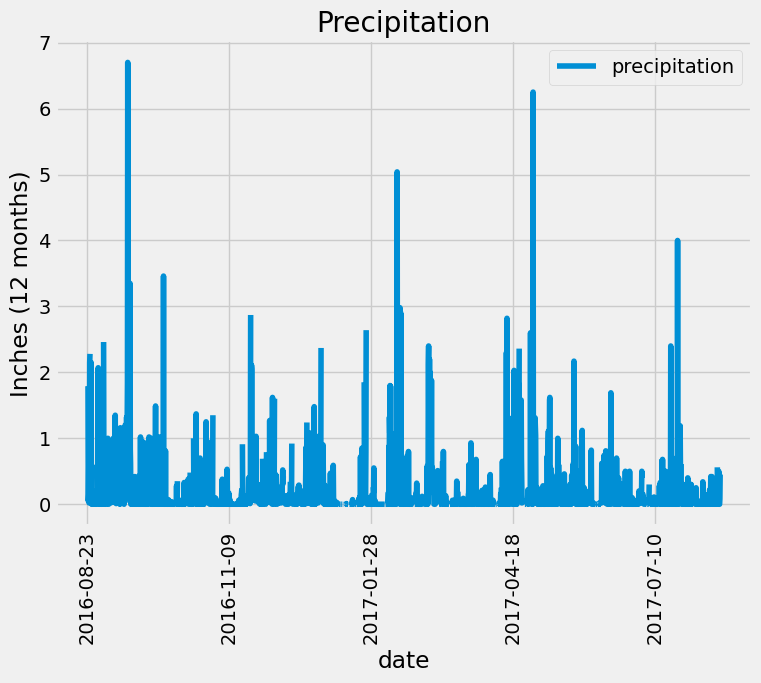

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


# Step 1: Find the most recent date in the `Measurement` table
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

# Step 2: Calculate the date 12 months ago from the most recent date
one_year_ago = dt.datetime.strptime(most_recent_date, "%Y-%m-%d") - dt.timedelta(days=365)
one_year_ago = dt.datetime.strftime(one_year_ago, "%Y-%m-%d")

# Step 3: Perform a query to retrieve the precipitation data for the last 12 months
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).all()

# Step 4: Save the query results as a Pandas DataFrame and set the column names
precipitation_df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Step 5: Sort the DataFrame by date
precipitation_df = precipitation_df.sort_values("date")

# Step 6: Plot the precipitation data using Pandas and Matplotlib
ax = precipitation_df.plot(x='date', y='precipitation', figsize=(8,6))
plt.xticks(rotation=90)
plt.ylabel("Inches (12 months)")
plt.title("Precipitation")
plt.show()



In [29]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [30]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [32]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
# Perform a query to find the most active stations
most_active_stations = session.query(Measurement.station, func.count(Measurement.station))\
                    .group_by(Measurement.station)\
                    .order_by(func.count(Measurement.station).desc())\
                    .all()

# Print the results
most_active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [55]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Query to calculate temperature statistics for the most active station

most_active = "USC00519281"

temp_stats = session.query(func.min(Measurement.tobs),
                           func.max(Measurement.tobs),
                           func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
temp_stats

[(54.0, 85.0, 71.66378066378067)]

In [56]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
histogram = session.query(Measurement.tobs).\
      filter(Measurement.date >= one_year_ago, Measurement.station == 'USC00519281').\
      order_by(Measurement.tobs).all()

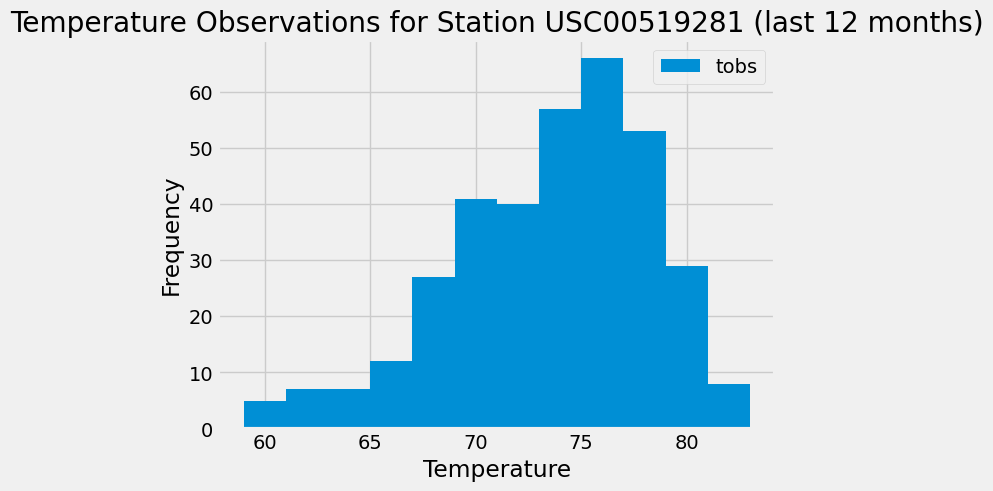

In [57]:
# Query the last 12 months of temperature observation data for the most active station
results = session.query(Measurement.tobs)\
                .filter(Measurement.station == most_active)\
                .filter(Measurement.date >= one_year_ago).all()

# Convert the query results to a DataFrame
temp_df = pd.DataFrame(results, columns=['tobs'])

# Plot the results as a histogram
temp_df.plot.hist(bins=12)

# Add axis labels and a title
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Observations for Station USC00519281 (last 12 months)")

# Show the plot
plt.show()


In [58]:
# Close Session
session.close()